<a href="https://colab.research.google.com/github/Azuremis/make_your_first_gan_with_pytorch/blob/master/simple_pattern_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries

import torch
import torch.nn as nn

import random
import pandas
import matplotlib.pyplot as plt

Real data source

In [2]:
# set up real data source
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)]
    )

    return real_data

In [3]:
# check range of numbers generated makes sense
generate_real()

tensor([0.9835, 0.1482, 0.9450, 0.1021])

Creating the discriminator

In [4]:
# set up the discriminator
class Discriminator(nn.Module):

    def __init__(self):
        # initialise parent pytorch class
        super().__init__()

        # set up nn layers
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        # set up loss
        self.loss_function = nn.MSELoss()

        # set up optimiser
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # set up progress monitors
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        # just run the model
        return self.model(inputs)

    def train(self, inputs, targets):
        # calculate predictions
        outputs = self.forward(inputs)

        # calculate loss
        loss = self.loss_function(outputs, targets)

        # track training progress
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())  # accumulate error
        if self.counter % 10000 == 0:
            print("counter = ", self.counter)

        # zero gradients
        self.optimiser.zero_grad()
        # perform backward pass by calcuating gradients
        loss.backward()
        # update learnable parameters
        self.optimiser.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=["loss"])    
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.',
                grid=True, yticks=(0, 0.25, 0.5))


Testing the discriminator

In [5]:
# generates random noise
def generate_random(size):
    return torch.rand(size)

In [7]:
discrim = Discriminator()

for i in range(10000):
    # train with real data
    discrim.train(generate_real(), torch.FloatTensor([1.0]))
    # train with fake data
    discrim.train(generate_random(4), torch.FloatTensor([0.0]))


counter =  10000
counter =  20000


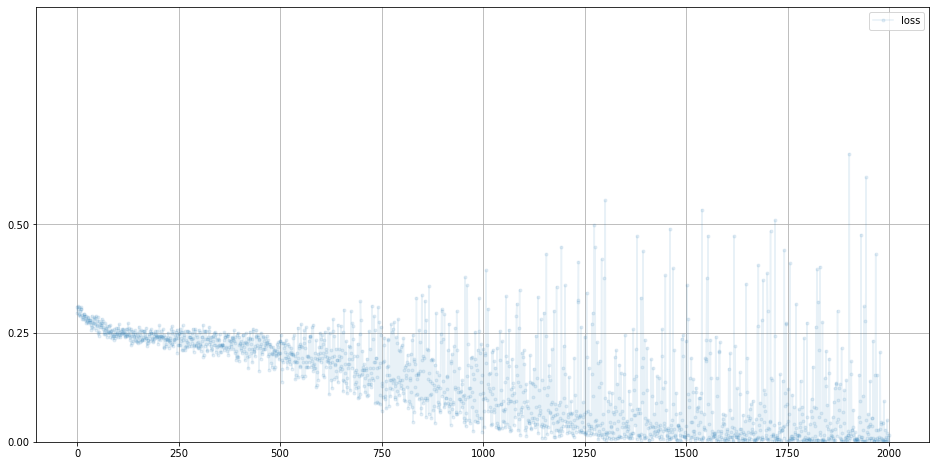

In [8]:
# plot model loss
discrim.plot_progress()

In [19]:
# manual run to check discriminitor is working
print("With real data:", discrim.forward(generate_real()).item())
print("With random data:", discrim.forward(generate_random(4)).item())

With real data: 0.7722018361091614
With random data: 0.13298042118549347
